# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: Пшеничников Глеб, 317

Дата выдачи: <span style="color:red">__13 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__28 февраля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

In [5]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

1)
$$
dy_j = \tilde{y_j} d \gamma + \gamma d \tilde{y_j} + d \delta
$$
3) Найдем $d \tilde{y_j}$:
   $$
    d \tilde{y_j} = \frac {1}{\sqrt{\sigma ^ 2 + \varepsilon}} d X_j - \frac{1}{\sqrt{\sigma ^ 2 + \varepsilon}} d \mu - \frac12 \frac {X_j - \mu}{{(\sigma ^ 2 + \varepsilon)}^{\frac32}} d \sigma ^ 2
   $$
   $$
    d \mu = \frac1n \sum_{i=1}^n d X_i
   $$
   $$
    d \sigma ^2 = \sum_{i=1}^n \frac2n (X_i - \mu) (d X_i - d \mu) = \{ \sum_{i=1}^n (X_i - \frac1n \sum_{i=1}^n X_i) = 0 \} = 0  
   $$
    Но для строгости будем считать, что:  $d \sigma ^2 = \sum_{i=1}^n \frac2n (X_i - \mu) d X_i$

   Итого:
   $$
    d \tilde{y_j} = \frac {1}{\sqrt{\sigma ^ 2 + \varepsilon}}(d X_j - \frac1n \sum_{i=1}^n d X_i - \frac1n  \frac {X_j - \mu}{{\sigma ^ 2 + \varepsilon}} \sum_{i=1}^n (X_i - \mu) d X_i) =  \frac {1}{\sqrt{\sigma ^ 2 + \varepsilon}}(d X_j - \frac1n \sum_{i=1}^n d X_i - \frac{\tilde{y_j}}{n} \sum_{i=1}^n \tilde{y_i} d X_i) 
   $$

4) Тогда:
  $$
   dy_j = \tilde{y_j} d \gamma + \gamma \frac {1}{\sqrt{\sigma ^ 2 + \varepsilon}}(d X_j - \frac1n \sum_{i=1}^n d X_i - \frac{\tilde{y_j}}{n} \sum_{i=1}^n \tilde{y_i} d X_i)  + d \delta
    $$



5) Найдем $d \mathcal{L}$
   $$
   d \mathcal{L} = \langle \nabla_y \mathcal{L}, dy \rangle = \sum_{j=1}^n ( \nabla_{y_j} \mathcal{L}) dy_j = \sum_{j=1}^n ( \nabla_{y_j} \mathcal{L}) (\tilde{y_j} d \gamma + \gamma \frac {1}{\sqrt{\sigma ^ 2 + \varepsilon}}(d X_j - \frac1n \sum_{i=1}^n d X_i - \frac{\tilde{y_j}}{n} \sum_{i=1}^n \tilde{y_i} d X_i)  + d \delta) = $$
   $$ = \langle \nabla_y \mathcal{L}^T \tilde{y}, d \gamma \rangle + \langle \frac {\gamma }{\sqrt{\sigma ^ 2 + \varepsilon}} (\nabla_y \mathcal{L} - \frac1n \mathbf{1} (\mathbf{1}^T \nabla_{y} \mathcal{L}) - \frac1n \tilde{y} (\tilde{y}^T \nabla_{y} \mathcal{L}), dX \rangle + \langle \mathbf{1}^T \nabla_y \mathcal{L}, d \delta \rangle
   $$

6) Ответ:
   $$
    \nabla_\gamma \mathcal{L} = \nabla_y \mathcal{L}^T \tilde{y}
    $$
      $$
    \nabla_\delta \mathcal{L} = \mathbf{1}^T \nabla_y \mathcal{L}
    $$
         $$
    \nabla_X \mathcal{L} = \frac {\gamma }{\sqrt{\sigma ^ 2 + \varepsilon}} (\nabla_y \mathcal{L} - \frac1n \mathbf{1} (\mathbf{1}^T \nabla_{y} \mathcal{L}) - \frac1n \tilde{y} (\tilde{y}^T \nabla_{y} \mathcal{L})
    $$



### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

Мы хотим найти такие инициализации, для которых будет справедливо: $\mathbb{E}[y^l] = 0$ и $\mathbb{D}[y^l]$ была неизменной при переходе от слоя к слою (это небходиом для того, чтобы при прямом ходе активации не затухали и не взрывались); $\mathbb{E}[\delta^l] = 0$ и $\mathbb{D}[\delta^l]$ была неизменной при переходе от слоя к слою, где $\delta^l = \frac{\partial L}{\partial y^{l}}$ (это небходиом для того, чтобы при обратном ходе градиенты не затухали и не взрывались)

Для решения сделаем несколько выводов, исходя из предположений ($\forall i = \overline{1, n_{l}}, j = \overline{1, n_{l}}$):
1)  $\mathbb{E}[x^l] = \mathbb{E}[x_i^l],\ \mathbb{D}[x^l] = \mathbb{D}[x_i^l]$ в силу предположения 3
2) $\mathbb{E}[y^l] = \mathbb{E}[y_i^l],\ \mathbb{D}[y^l] = \mathbb{D}[y_i^l]$ в силу предположения 2
3) $\mathbb{E}[\delta^l] = \mathbb{E}[\delta_i^l],\ \mathbb{D}[\delta^l] = \mathbb{D}[\delta_i^l]$ в силу предположения 4
4) $y_i^l = \sum_{j=1}^{n_l} W_{ij}^l x_j^l + b_j =  \sum_{j=1}^{n_l} W_{ij}^l x_j^l$ в силу предположения 8
5) $\mathbb{E}[y_i^l] = \mathbb{E}[\sum_{j=1}^{n_l} W_{ij}^l x_j^l] = \sum_{j=1}^{n_l} \mathbb{E}[ W_{ij}^l x_j^l] = \sum_{j=1}^{n_l} \mathbb{E} [W_{ij}^l] \cdot \mathbb{E} [x_j^l]$ в силу предположений 5, 7
6) $\mathbb{D}[y_i^l] = \mathbb{D}[\sum_{j=1}^{n_l} W_{ij}^l x_j^l] = \sum_{j=1}^{n_l} \mathbb{D}[ W_{ij}^l x_j^l] = \sum_{j=1}^{n_l} \mathbb{D} [W_{ij}^l] \cdot \mathbb{D} [x_j^l]$ в силу предположений 5, 7
7)  $\mathbb{E}[W_{ij}^l] = \int\limits_{-\infty}^{\infty} x \cdot p_{W_{ij}^l} (x) dx = \int\limits_{-\infty}^{0} x \cdot p_{W_{ij}^l} (x) dx + \int\limits_{0}^{\infty} x \cdot p_{W_{ij}^l}  (x) dx =  \int\limits_{\infty}^{0} (-x) \cdot p_{W_{ij}^l} (-x) d(-x) + \int\limits_{0}^{\infty} x \cdot p_{W_{ij}^l}  (x) dx = $
    $= -\int\limits_{0}^{\infty} (-x) \cdot p_{W_{ij}^l} (-x) d(-x) + \int\limits_{0}^{\infty} x \cdot p_{W_{ij}^l}  (x) dx = -\int\limits_{0}^{\infty} (x) \cdot p_{W_{ij}^l} (x) d(x) + \int\limits_{0}^{\infty} x \cdot p_{W_{ij}^l}  (x) dx = 0$  в силу предположения 6, 7
8) $\sum_{j=1}^{n^l}W_{ij}^l \cdot x_j^l$ имеет четную плонтность расределения, тогда в силу пункта 3 $y_i^l$ имеет тоже четную плотность распределения
9) $\mathbb{E}[W_{ij}^l] = \mathbb{E}[W^l],\ \mathbb{D}[W_{ij}^l] = \mathbb{D}[W^l]$ в силу предположения 1
10) $\delta^l_j = \sum_{k=1}^{n^{l+1}} \delta^{l+1}_k W^{l+1}_{k_j} g'(y^{l_j})$ выводилось на семинаре
11) $\mathbb{E}[\delta^l] = \mathbb{E}[\delta^l_j] = n^{l+1}\mathbb{E}[W^{l+1}] \cdot \mathbb{E}[\delta^{l+1}] \cdot \mathbb{E}[g'(y^l_j)]$ в силу пунктов 3, 9, 10
12) $\mathbb{D}[\delta^l] = \mathbb{D}[\delta^l_j] = n^{l+1}\mathbb{D}[W^{l+1}] \cdot \mathbb{D}[\delta^{l+1}] \cdot \mathbb{D}[g'(y^l_j)]$ в силу пунктов 3, 9, 10

Тогда $\mathbb{E}[y^l] = \mathbb{E}[y_i^l]= \sum_{j=1}^{n_l} \mathbb{E} [W_{ij}^l] \cdot \mathbb{E} [x_j^l] = 0$ в силу пунктов 2, 5, 7

Тогда $\mathbb{D}[y^l] = \mathbb{D}[y_i^l]  = \sum_{j=1}^{n_{l-1}} \mathbb{D}[W_{ij}^l] \cdot \mathbb{D}[x_j^l] = n^{l-1} \cdot \mathbb{D}[W^l] \cdot \mathbb{D}[x^l]$ в силу пунктов 1, 2, 6, 9. ReLU обнуляет непложительные значения, поэтому дисперсия с каждым слоем будет уменьшатьяс в два раза (в силу предположения 3). Тогда: $n^{l-1} \mathbb{D}[W^l] = 2$ , получаем $ \mathbb{D}[W^l] = \frac{2}{n^{l-1}}$

Тогда $\mathbb{E}[\delta^l] = \mathbb{E}[\delta^l_j] = n^{l+1}\mathbb{E}[W^{l+1}] \cdot \mathbb{E}[\delta^{l+1}] \cdot \mathbb{E}[g'(y^l_j)] = 0 $ в сиду пунктов 11, 7

ReLU обнуяляет обнуляел градиенты, отвечающие неположительным активацием, поэтому диссперсися от слоя к слою будет уменьшаться в два раза
(в силу предположения 4). Тогда $n^l\mathbb{D}[W^l] = 2$, получаем $\mathbb{D}[W^l] = \frac{2}{n^l}$

Итого: $ \mathbb{D}[W^l] = \frac{2}{n^{l-1}}$ и $\mathbb{D}[W^l] = \frac{2}{n^l}$. Если $n^{l-1} = n^l = n$, то $\mathbb{D}[W^l] = \frac{2}{n}$. Если нет, то можно использовать среднее гармоническое: $\mathbb{D}[W^{l}] = \frac{4}{n^{l-1}+n^{l}}$



### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

1) **Решает проблему затухания градиеентов**: производная сигмоиды лежит на отрезке $(0,1)$, поэтому при передвижении к началу сети градиент будет уменьшаться и будет иметь значения в окрестности нуля (так как мы перемножаем числа из отрезка $(0,1)$) - особенно это будет заметно при насыщенной сигмоиде (когда значения или около 0, или около 1) - получается, что градиент затухнет. С ReLU такого произойти не может, так как его производная либо 0 (если значение аргумента меньше или равно нулю), либо 1 (если значение аргумента больше нуля)
2) **Меньшая вычислительная сложность**: для сигмоиды надо вычислять экспоненты (делает при помощи рядов Тейлора), ReLU вычисляется только при помощи операции сравнения, что значительно легче, с точки зрения вычислительной сложности
3) **Нет смещения активаций**: сигмоида центрирована около 0.5, ReLU смещает среднее активации к 0 (помогает сети быстрее сходиться)

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [1]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:           
    output = layer.forward(input)

    - Propagate gradients through itself:    
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any) 
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], 
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output): 
        """
        Performs a backpropagation step through the layer, 
        with respect to the given input.

        To compute loss gradients w.r.t input, 
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument, 
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to 
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel() 
          applied to each gradient). 
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        ### your code here
        self.input = input
        return np.maximum(0, input)
        
    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        grad_input = grad_output.copy()
        grad_input[self.input <= 0] = 0
        return grad_input, []
    
    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [6]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [34]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b
        
        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        ### your code here
        self.input = input
        return input @ self.weights + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]
        
        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        ### your code here
        grad_w = self.input.T @ grad_output
        grad_b = np.sum(grad_output, axis=0) 
        grad_input = grad_output @ self.weights.T
        return grad_input, np.r_[grad_w.ravel(), grad_b.ravel()]
    
    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [9]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

$$
df = \sum_{i} \mathbb{1}[x_i > 0] \cdot dx_i
$$

$$
\nabla_x f = (\mathbb{1}(x_1 > 0), \mathbb{1}(x_2 > 0), ... , \mathbb{1}(x_n > 0))
$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [30]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
output = relu.forward(points)
output = np.ones_like(output)
grads = relu.backward(output)[0]

def f(x):
    return relu.forward(x).sum()
numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):
$$ f(y) = \sum_i y_i = \mathbf{1}^T (W x + b)
$$

$$
df = \mathbf{1}^Tdy = \mathbf{1}^T W dx
$$

$$
\nabla_x f = \mathbf{1} W^T 
$$

Следующая ячейка после заполнения должна не выдавать ошибку :)

In [41]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

### your code here
output = linear.forward(points)
output = np.ones_like(output)
grads = linear.backward(output)[0]

def f(x):
    return linear.forward(x).sum()

numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [42]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [95]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        ### your code here
        self.output = input - logsumexp(input, axis=1, keepdims=True)
        return self.output
        
    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1 
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        ### your code here
        return grad_output - np.exp(self.output) * np.sum(grad_output, axis=1,  keepdims=True), []
    
    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [96]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    ### your code here
    batch_size = activations.shape[0]
    return -np.mean(activations[np.arange(batch_size), target])


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    ### your code here
    batch_size = activations.shape[0]
    grad = np.zeros_like(activations)
    grad[np.arange(batch_size), target] = -1.0 / batch_size
    return grad

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [98]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

### your code here
output = lsm.forward(points)
grad_output = grad_NLL(output, target)
grads = lsm.backward(grad_output)[0]

def f(x):
    return NLL(lsm.forward(x), target)

numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
from sklearn.datasets import load_digits

In [186]:
X, y = load_digits(return_X_y=True)

In [187]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [190]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [191]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [192]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [193]:
def forward(network, X):
    """
    Perform forward pass through the network.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: 
    output shape: [batch, out_features_num]
    """
    ### your code here
    input = X
    for layer in network:
        input = layer.forward(input)
    return input

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [194]:
def predict(network, X):
    """
    Returns predictions for each object in X.
    
    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    ### your code here
    logprobs = forward(network, X)
    return np.argmax(logprobs, axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [195]:
from scipy.optimize import minimize

In [196]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [197]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [198]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]
    
    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)
    
    Do not forget to set weights of the network!
    """
    network, X, y = args
    ### your code here
    set_weights(weights, network)
    logprobs = forward(network, X)
    loss = NLL(logprobs, y)
    grad_input = grad_NLL(logprobs, y)
    grad_params = []
    for i in range(len(network) - 1, -1, -1):
        grad_input, grad_layer = network[i].backward(grad_input)
        if len(grad_layer) > 0:
            if len(grad_params) > 0:
                grad_params = np.concatenate([grad_layer, grad_params]) 
            else:
                grad_params = grad_layer
    return loss, grad_params

Теперь мы готовы обучать нашу нейросеть. 

In [199]:
weights = get_weights(network)

In [200]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [201]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [202]:
res["nit"] # number of iterations (should be >> 10)

113

In [203]:
res["success"] # should be True

True

In [204]:
res["x"] # leraned weights

array([ 8.94875451e-03, -5.46609641e-04, -6.41774120e-03, ...,
       -3.90714387e-01, -1.04737124e+00, -2.21250907e-01])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [205]:
### your code here
def accuracy(y_pred, y_true):
    return np.mean(y_pred == y_true)

set_weights(res["x"], network)
train_pred = predict(network, X_train)
test_pred = predict(network, X_test)
print(f"Качество на X_train: {accuracy(train_pred, y_train):.3f}")
print(f"Качество на X_test: {accuracy(test_pred, y_test):.3f}")

Качество на X_train: 1.000
Качество на X_test: 0.956


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [333]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        ### your code here
        set_weights(weights, self.network)
        train_pred = predict(network, X_train)
        test_pred = predict(network, X_test)
        temp_train_acc = accuracy(train_pred, y_train)
        temp_test_acc = accuracy(test_pred, y_test)
        self.train_acc.append(temp_train_acc)
        self.test_acc.append(temp_test_acc)
        
        if self.print:
            print(f'Качество на X_train: {temp_train_acc:.3f}; качество на X_test: {temp_test_acc:.3f}')

In [334]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,  
    args=[network, X_train, y_train], 
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Качество на X_train: 0.092; качество на X_test: 0.087
Качество на X_train: 0.105; качество на X_test: 0.091
Качество на X_train: 0.171; качество на X_test: 0.173
Качество на X_train: 0.275; качество на X_test: 0.276
Качество на X_train: 0.321; качество на X_test: 0.293
Качество на X_train: 0.390; качество на X_test: 0.376
Качество на X_train: 0.428; качество на X_test: 0.427
Качество на X_train: 0.530; качество на X_test: 0.520
Качество на X_train: 0.644; качество на X_test: 0.616
Качество на X_train: 0.684; качество на X_test: 0.664
Качество на X_train: 0.795; качество на X_test: 0.762
Качество на X_train: 0.830; качество на X_test: 0.789
Качество на X_train: 0.860; качество на X_test: 0.836
Качество на X_train: 0.887; качество на X_test: 0.853
Качество на X_train: 0.915; качество на X_test: 0.878
Качество на X_train: 0.921; качество на X_test: 0.893
Качество на X_train: 0.932; качество на X_test: 0.913
Качество на X_train: 0.941; качество на X_test: 0.918
Качество на X_train: 0.952; 

Изобразите на графике кривую качества на обучени и контроле по итерациям:

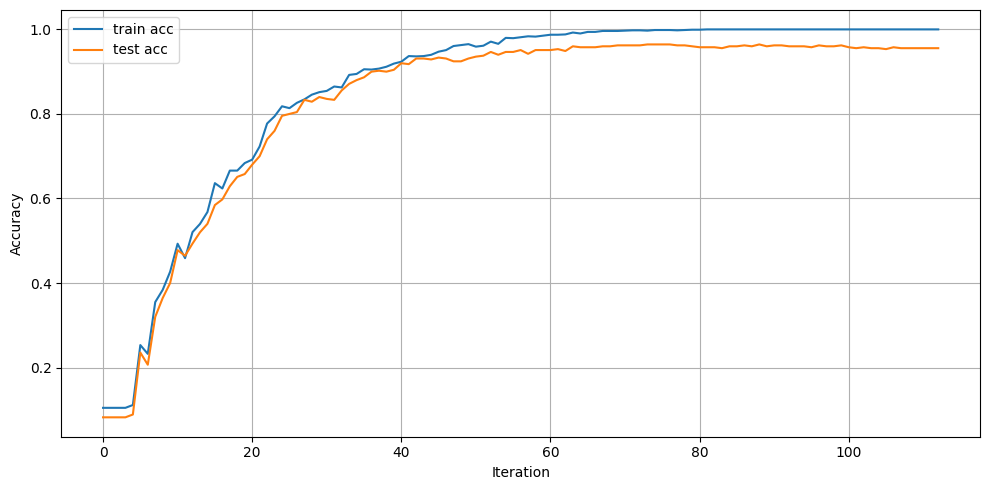

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [220]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [223]:
### your code here
for i in range (5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=i + 1)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i,j] = cb.train_acc[-1]
        accs_test[i,j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

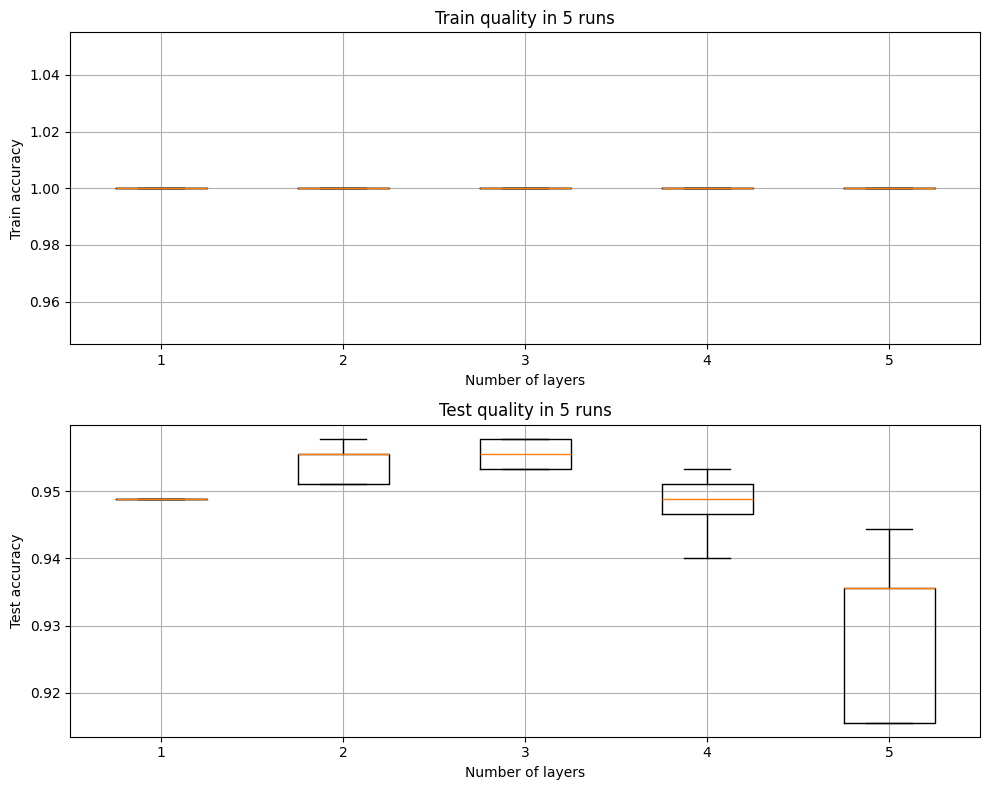

In [224]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

1) На обучающей выборке точность максимальна (1.0) при любом количестве слоев, разброса нет (модель хорошо подстраивается под обучающую выборку). На контроле максимальная точность достигается при 2 и 3 слоях, при дальнейшем увеличении числа слоев до 4, 5 - снижение точности (вознкает переобучение). Так же с увеличением числа слоев растет разброс результатов между запусками (особенно заметно для 5 слоев, при 1-3 слоях разброс меньше)
2) Нелинейные модели с 2-3 слоями дают более высокую точность, чем логистическая регрессия (случай, когда 1 слой). Поэтому да, логистическая регрессия дает качество хуже, чем нелинейная модель с 2-3 слоями (это говорит о том, что данные не являются линейно разделимыми).

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [225]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                ### your code here
                temp = np.sqrt(2.0 / input_units)
                layer.weights = np.random.randn(input_units, output_units) * temp
            elif initialization == 'Xavier':
                ### your code here
                temp = np.sqrt(2.0 / (input_units + output_units))
                layer.weights = np.random.randn(input_units, output_units) * temp
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)
            
            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [238]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [239]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [240]:
### your code here
for i in range (5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i,j] = cb.train_acc[-1]
        accs_test[i,j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

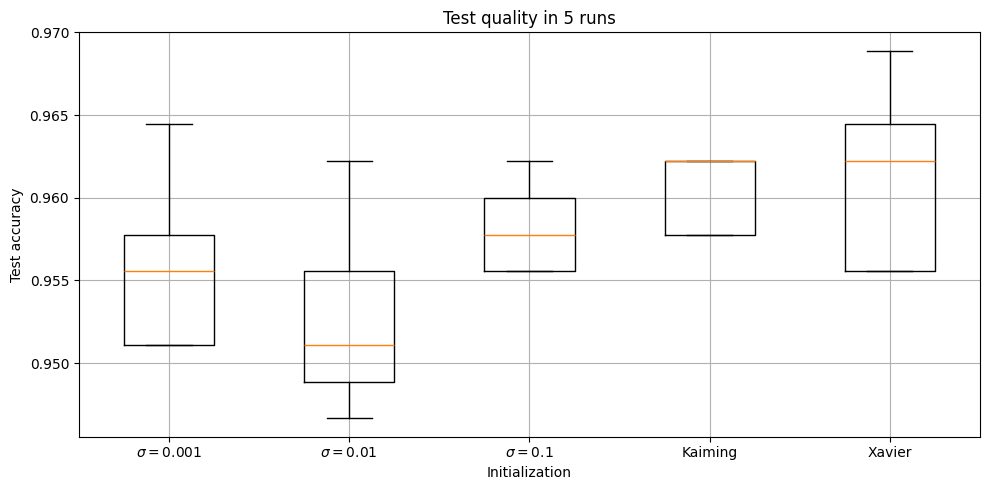

In [241]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, tick_labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [242]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [243]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [244]:
### your code here
for i in range (5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=4)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i,j] = cb.train_acc[-1]
        accs_test[i,j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

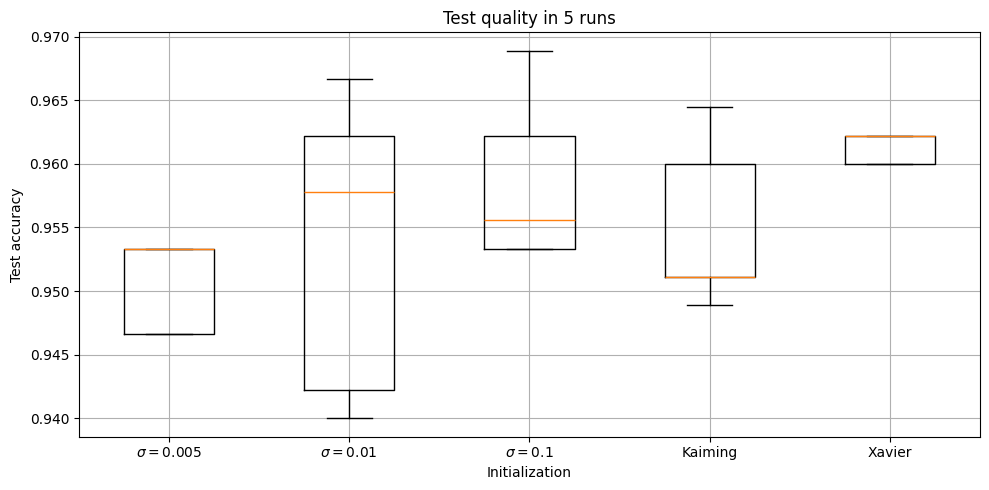

In [246]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, tick_labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [249]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [250]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [251]:
### your code here
for i in range (5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=5)
        initialize_network(network, init_vars[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i,j] = cb.train_acc[-1]
        accs_test[i,j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

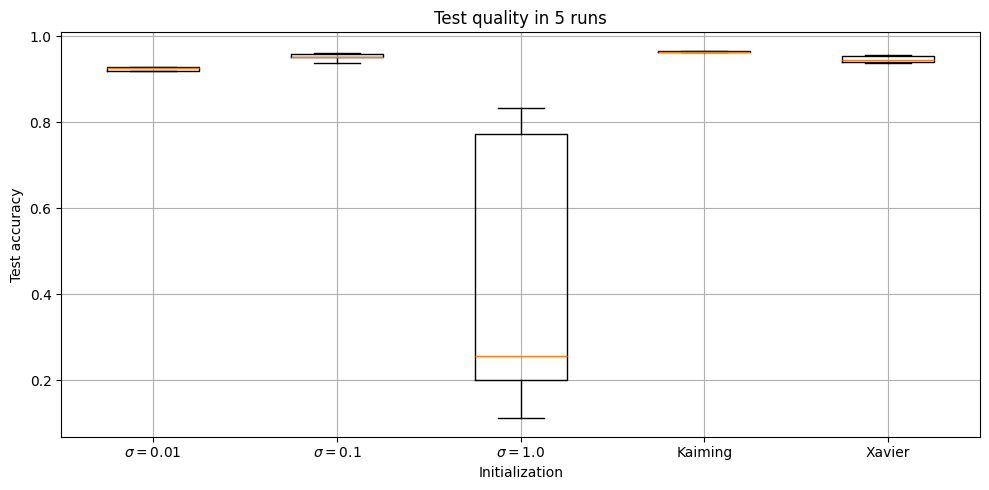

In [253]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, tick_labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__
1) **Для сети с 3 слоями**: Xavier и Kaiming инициализации показывают наилучшие средние результаты около 0.96 (особенно Xavier с самым высоким максимумом (около 0.968). Наиболее стабильные результаты дает Kaiming и $\sigma =0.1 $, которые имеют меньший разброс значений.

   **Для сети с 4 слоями**: Xavier инициализация превосходит остальные по качеству (медиана около 0.962), $\sigma =0.1 $ и $\sigma =0.01 $ показывают схожие результаты с высокими максимумами, но большим разбросом. Xavier показывает не только лучшее качество, но и наибольшую стабильность.
   
   **Для сети с 5 слоями**: Xavier и Kaiming инициализации, а также $\sigma =0.1 $ и $\sigma =0.01$ демонстрируют схожие высокие результаты; так же видим резкое падение качества для $\sigma =1$. Cлишком большие начальные веса (как $\sigma =1$) делают обучение глубокой сети нестабильным. Xavier, Kaiming и малые $\sigma$ делает обучение стабильным.

2) **Xavier** инициализация показывает наилучшие результаты для всех глубин сетей, особенно заметно её преимущество на 4-х и 5-и слоях сети. Она показывает стабильно высокую точность и меньший разброс результатов при увеличении глубины.

    **Kaiming** инициализация эффективна для 3-х слоев сети, но начинает уступать Xavier на более глубоких сетях.

    **Стандартная инициализация со средним значением ($\sigma =0.1$)** показывает относительно хорошие результаты даже для глубоких сетей, но хуже, чем Xavier и Kaiming.

    **Инициализация с большими значениями $\sigma =1$** не подходит для обучение глубоких сетей (из-за проблемы взрывающихся градиентов)

    **Очень малые значения инициализации $\sigma =0.01$** не подходит для обучение глубоких сетей (из-за проблемы затухающих градиентов)


Вывод: Xavier и Kaiming инициализации подходят лучше всего для обучения глубоких нейронных сетей 

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [256]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [257]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [262]:
### your code here
for init in init_vars:
    network = make_network(input_size, hidden_layers_size, output_size, n_layers=4)
    initialize_network(network, init)
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = minimize(
        compute_loss_grad, weights,  
        args=[network, X_train, y_train], 
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_test_on_iterations.append(cb.test_acc)
    accs_train_on_iterations.append(cb.train_acc)

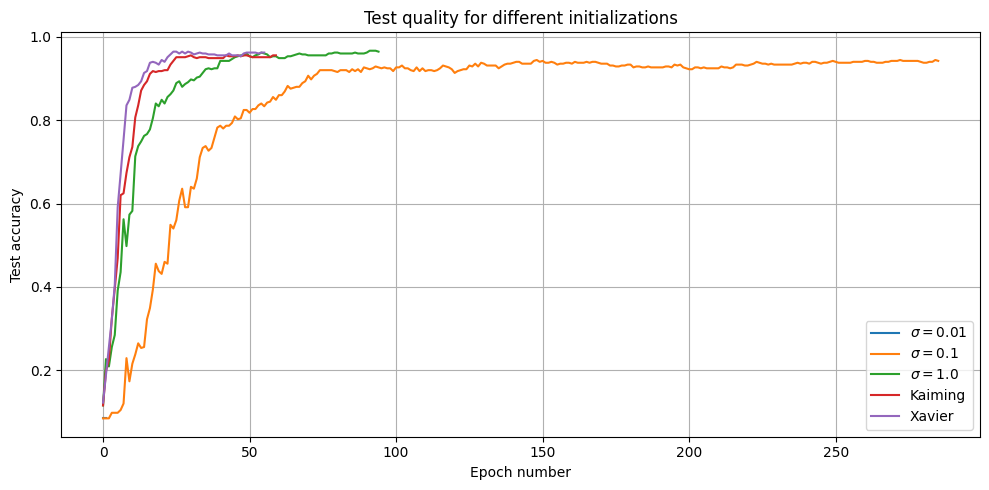

In [263]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for idx, label in enumerate(init_vars_for_plot):
    ax.plot(accs_test_on_iterations[idx], label=label)

ax.set_title("Test quality for different initializations")
ax.set_xlabel("Epoch number")
ax.set_ylabel("Test accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__
1) **Xavier**: показывает наилучшую скорость сходимости из всех рассмотренных методов, достигает высокой точности примерно к 20-й эпохе
2) **Kaiming**: быстрое обучение, почти такое же эффективное, как Xavier, достигает высокой точности примерно к 25-й эпохе
3) $\sigma=1$: cредняя скорость обучения, достигает высокой точности примерно к 50-й эпохе; постепенно догоняет Xavier и Kaiming инициализации к 75-й эпохе
4) $\sigma=0.1$: значительно более медленное обучение по сравнению с другими методами, достигает высокой точности только после 100-й эпохи, максимальная точность ниже, чем у других методов; большое количество колебаний в процессе обучения - нестабильность градиентного спуска

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [264]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        ### your code here
        self.output = np.tanh(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        grad_input = grad_output * (1 - self.output**2)
        return grad_input, []

    def __repr__(self):
        return 'Tanh()'

In [271]:
from scipy.special import expit
    
class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        ### your code here
        self.output = expit(input)
        return self.output

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        ### your code here
        grad_input = grad_output * self.output * (1 - self.output)
        return grad_input, []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [282]:
act_func_vars = ['ReLU', 'Sigmoid','Tanh']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [283]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [286]:
### your code here
act = [ReLU, Sigmoid, Tanh]
for i in range (3):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=act[i])
        initialize_network(network, init_for_act_funcs[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,  
            args=[network, X_train, y_train], 
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i,j] = cb.train_acc[-1]
        accs_test[i,j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

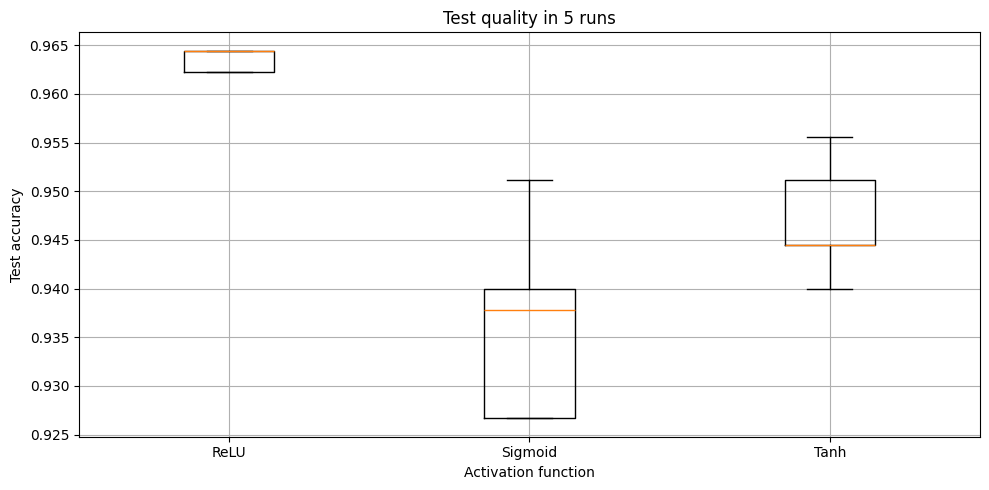

In [288]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, tick_labels=act_func_vars, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Activation function")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__
1) **ReLU**: показывает наивысшую точность (около 0.96), имеет наименьший разброс результатов - затехание градиентов отсутсвуют
2) **Sigmoid**: показывает наименьшую точность из трех активаций, имеет самый большой разброс результатов (наименьшая устойчивость обучения) - проблемы вознакет из-за отсутствия центрированности и проблемы затухания градиента 
3) **Tanh**: имеет среднюю точность и умеренный разброс - так же имеет место проблема затухания градиентов 

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [306]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    # your code is here
    theta = np.copy(x0)
    n_samples = X.shape[0]
    b = None
    for t in range(1, n_iter + 1):
        indices = np.random.permutation(n_samples)
        kol = n_samples // batch_size
        for i in range(kol):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]
            X_batch, y_batch = X[batch_indices], y[batch_indices]
            g_t = jac(theta, (net, X_batch, y_batch))
            if mu != 0:
                if t > 1 or i > 0:
                    b_t = mu * b + g_t
                else:
                    b_t = g_t
                g_t = b_t
                b = b_t
            theta = theta - gamma * g_t

        callback(theta)

    result = OptimizeResult(
        x=theta,
        fun=fun(theta, args),
        jac=jac(theta, args),
        nit=n_iter,
        success=True
    )
    return result

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [307]:
# your code is here
network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
initialize_network(network, 'Xavier')
weights = get_weights(network)
kwargs = {
    'momentum': 0.9,
    'n_iter': 200,
    'lr': 0.01,
    'batch_size': 100
}
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
res = minimize(
    compute_loss_grad, weights,  
    args=(network, X_train, y_train), 
    method=SGD,
    jac=True,
    options=kwargs,
    callback=cb.call,
)

print(f"Качество на X_train: {cb.train_acc[-1]:.3f}")
print(f"Качество на X_test: {cb.test_acc[-1]:.3f}")

Качество на X_train: 1.000
Качество на X_test: 0.958


**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [436]:
# your code is here
import time

algorithms = ['L-BFGS-B', 'SGD', 'SGD+momentum']
batch_sizes = [8, 32]
momentums = [0, 0.9]
lrs = np.logspace(-3, -1, 5)
lbfgs_res = []
sgd_res = []
sgd_mom_res = []

for name in algorithms:
    if name == 'L-BFGS-B':
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        initialize_network(network, 'Xavier')
        weights = get_weights(network)
        start_time = time.time()
        res = minimize(compute_loss_grad, weights,
                      args=[network, X_train, y_train],
                      method=name,
                      jac=True,
                      callback=cb.call)
        tm = time.time() - start_time
        lbfgs_res.append({'train_acc': cb.train_acc, 
                          'test_acc': cb.test_acc,
                          'time': tm})
    elif name == 'SGD':
        for b_s in batch_sizes:
            for lr in lrs:
                network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
                cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
                initialize_network(network, 'Xavier')
                weights = get_weights(network)
                start_time = time.time()
                start_time = time.time()
                kwargs = {
                    'momentum': 0,
                    'n_iter': 110,
                    'lr': lr,
                    'batch_size': b_s
                }
                res = minimize(compute_loss_grad, weights,  
                               args=(network, X_train, y_train), 
                               method=SGD,
                               jac=True,
                               options=kwargs,
                               callback=cb.call)
                tm = time.time() - start_time   
                sgd_res.append({'train_acc': cb.train_acc, 
                                'test_acc': cb.test_acc,
                                'b_s': b_s,
                                'lr': lr,
                                'time': tm})
                
    else:
        for b_s in batch_sizes:
            for lr in lrs:
                network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
                cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
                initialize_network(network, 'Xavier')
                weights = get_weights(network)
                start_time = time.time()
                start_time = time.time()
                kwargs = {
                    'momentum': 0.9,
                    'n_iter': 110,
                    'lr': lr,
                    'batch_size': b_s
                }
                res = minimize(compute_loss_grad, weights,  
                               args=(network, X_train, y_train), 
                               method=SGD,
                               jac=True,
                               options=kwargs,
                               callback=cb.call)
                tm = time.time() - start_time   
                sgd_mom_res.append({'train_acc': cb.train_acc, 
                                'test_acc': cb.test_acc,
                                'b_s': b_s,
                                'lr': lr,
                                'time': tm})


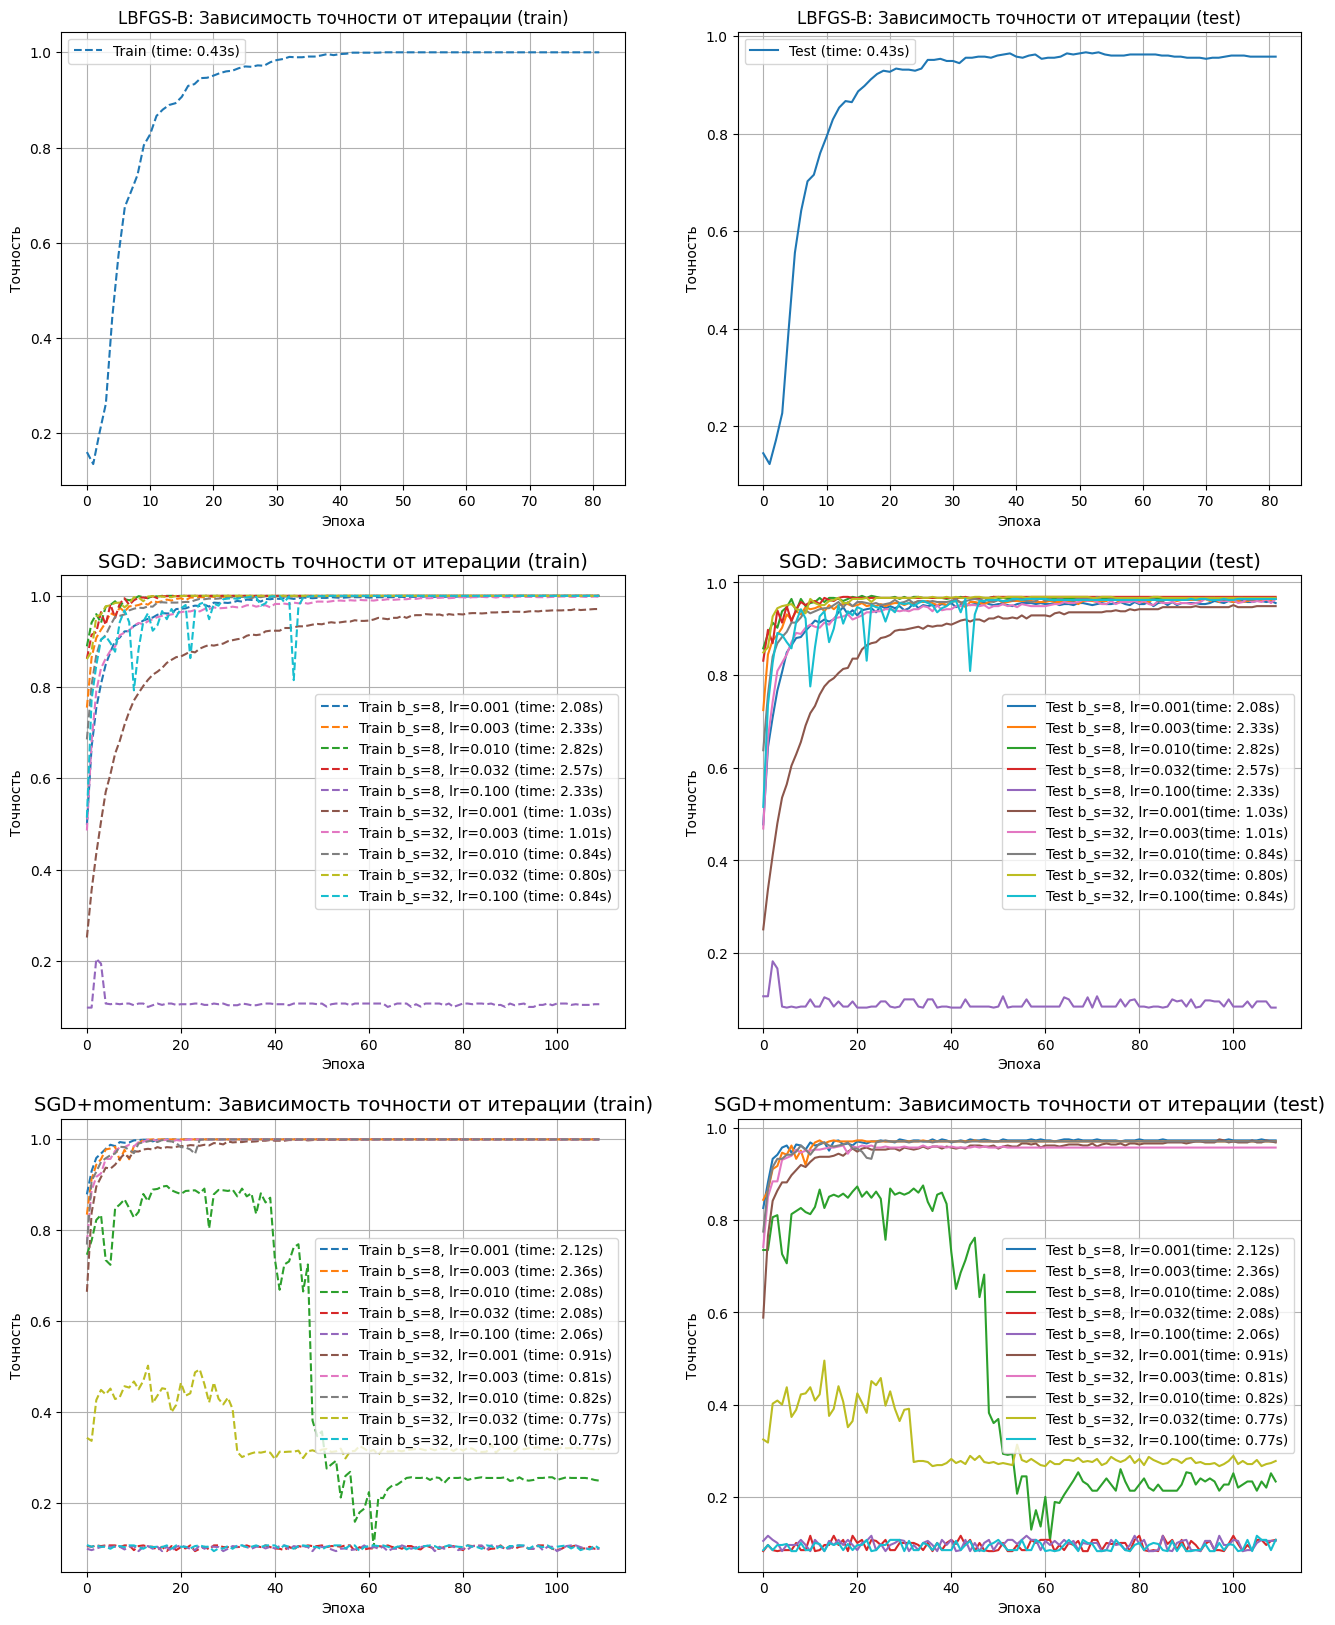

In [437]:
plt.figure(figsize=(16, 20))

plt.subplot(3, 2, 1)
tm = lbfgs_res[0]['time']
plt.plot(range(len(lbfgs_res[0]['train_acc'])), lbfgs_res[0]['train_acc'], '--', label=f'Train (time: {tm:.2f}s)')
plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("LBFGS-B: Зависимость точности от итерации (train)", fontsize=12)
plt.legend()
plt.grid(True)



plt.subplot(3, 2, 2)
tm = lbfgs_res[0]['time']
plt.plot(range(len(lbfgs_res[0]['train_acc'])), lbfgs_res[0]['test_acc'], label=f'Test (time: {tm:.2f}s)')
plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("LBFGS-B: Зависимость точности от итерации (test)", fontsize=12)
plt.legend()
plt.grid(True)





plt.subplot(3, 2, 3)
for elem in sgd_res:
    tm = elem['time']
    b_s = elem['b_s']
    lr = elem['lr']
    plt.plot(range(len(elem['train_acc'])), elem['train_acc'], '--', label=f'Train b_s={b_s}, lr={lr:.3f} (time: {tm:.2f}s)')
plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("SGD: Зависимость точности от итерации (train)", fontsize=14)
plt.legend()
plt.grid(True)


plt.subplot(3, 2, 4)
for elem in sgd_res:
    tm = elem['time']
    b_s = elem['b_s']
    lr = elem['lr']
    plt.plot(range(len(elem['train_acc'])), elem['test_acc'], label=f'Test b_s={b_s}, lr={lr:.3f}(time: {tm:.2f}s)')
plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("SGD: Зависимость точности от итерации (test)", fontsize=14)
plt.legend()
plt.grid(True)




plt.subplot(3, 2, 5)
for elem in sgd_mom_res:
    tm = elem['time']
    b_s = elem['b_s']
    lr = elem['lr']
    plt.plot(range(len(elem['train_acc'])), elem['train_acc'], '--', label=f'Train b_s={b_s}, lr={lr:.3f} (time: {tm:.2f}s)')
plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("SGD+momentum: Зависимость точности от итерации (train)", fontsize=14)
plt.legend()
plt.grid(True)


plt.subplot(3, 2, 6)
for elem in sgd_mom_res:
    tm = elem['time']
    b_s = elem['b_s']
    lr = elem['lr']
    plt.plot(range(len(elem['train_acc'])), elem['test_acc'], label=f'Test b_s={b_s}, lr={lr:.3f}(time: {tm:.2f}s)')
plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("SGD+momentum: Зависимость точности от итерации (test)", fontsize=14)
plt.legend()
plt.grid(True)

fig.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()





In [438]:
print('L-BFGS-B')
print(f'Train = {lbfgs_res[0]["train_acc"][-1]}, test = {lbfgs_res[0]["test_acc"][-1]:.3f} \n\n')

print('SGD')
for elem in sgd_res:
    print(f'b_s = {elem["b_s"]}, lr = {elem["lr"]:.3f}, Train = {elem["train_acc"][-1]:.3f}, test = {elem["test_acc"][-1]:.3f}')
print('\n\n')

print('SGD+momentum')
for elem in sgd_mom_res:
    print(f'b_s = {elem["b_s"]}, lr = {elem["lr"]:.3f}, Train = {elem["train_acc"][-1]:.3f}, test = {elem["test_acc"][-1]:.3f}')

L-BFGS-B
Train = 1.0, test = 0.958 


SGD
b_s = 8, lr = 0.001, Train = 1.000, test = 0.956
b_s = 8, lr = 0.003, Train = 1.000, test = 0.964
b_s = 8, lr = 0.010, Train = 1.000, test = 0.964
b_s = 8, lr = 0.032, Train = 1.000, test = 0.969
b_s = 8, lr = 0.100, Train = 0.105, test = 0.082
b_s = 32, lr = 0.001, Train = 0.971, test = 0.949
b_s = 32, lr = 0.003, Train = 0.998, test = 0.964
b_s = 32, lr = 0.010, Train = 1.000, test = 0.964
b_s = 32, lr = 0.032, Train = 1.000, test = 0.967
b_s = 32, lr = 0.100, Train = 1.000, test = 0.964



SGD+momentum
b_s = 8, lr = 0.001, Train = 1.000, test = 0.973
b_s = 8, lr = 0.003, Train = 1.000, test = 0.971
b_s = 8, lr = 0.010, Train = 0.249, test = 0.233
b_s = 8, lr = 0.032, Train = 0.099, test = 0.107
b_s = 8, lr = 0.100, Train = 0.099, test = 0.104
b_s = 32, lr = 0.001, Train = 1.000, test = 0.969
b_s = 32, lr = 0.003, Train = 1.000, test = 0.958
b_s = 32, lr = 0.010, Train = 1.000, test = 0.971
b_s = 32, lr = 0.032, Train = 0.318, test = 0.278
b_

**Выводы:**

1) L-BFGS-B показывает стабильную и высокую точность; SGD показывает хорошие результаты при правильном выборе гиперпараметров, но более чувствителен к их выбору; SGD+momentum при оптимальных гиперпараметрах достигает наилучших результатов (до 0.978 на тесте)
3) L-BFGS-B достигает высокой точности за наименьшее число итераций (около 30-40); SGD требует больше итераций для той же точности (более 100); SGD+momentum при оптимальных параметрах сходится быстрее, чем обычный SGD, но медленнее L-BFGS-B
4) Лучшие точности: SGD+momentum - 0.973; SGD - 0.969; L-BFGS-B - 0.958
5) L-BFGS-B показал наименьшее время обучения (0.43 секунды); SGD+momentum с оптимальными параметрами (batch_size = 8, lr = 0.001) требует 2.12 секунды, что примерно в 5 раз дольше L-BFGS-B (примерно столько же необходимо для обычного SGD)


Итого для достижения максимальной точности - SGD+momentum с b_s = 8, lr = 0.001; SGD batch_size = 8, learning_rate = 0.032

## Графики для лучших параметром моделей

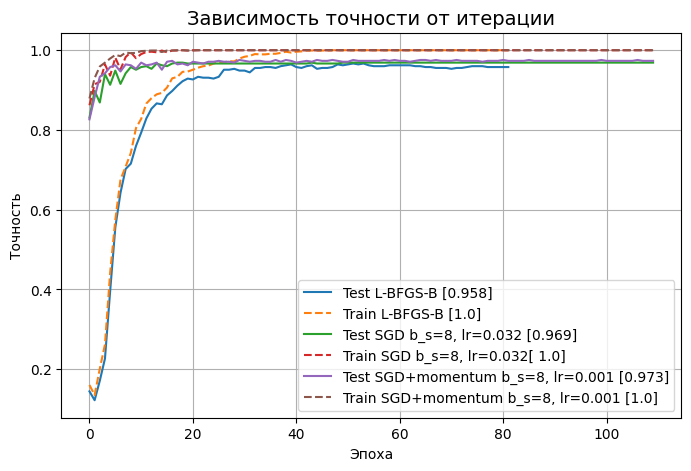

In [442]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(lbfgs_res[0]['train_acc'])), lbfgs_res[0]['test_acc'], label=f'Test L-BFGS-B [0.958]')
plt.plot(range(len(lbfgs_res[0]['train_acc'])), lbfgs_res[0]['train_acc'], '--', label=f'Train L-BFGS-B [1.0]')

elem = sgd_res[3]
tm = elem['time']
b_s = elem['b_s']
lr = elem['lr']
plt.plot(range(len(elem['train_acc'])), elem['test_acc'], label=f'Test SGD b_s={b_s}, lr={lr:.3f} [0.969]')
plt.plot(range(len(elem['train_acc'])), elem['train_acc'], '--', label=f'Train SGD b_s={b_s}, lr={lr:.3f}[ 1.0]')

elem = sgd_mom_res[0]
tm = elem['time']
b_s = elem['b_s']
lr = elem['lr']
plt.plot(range(len(elem['train_acc'])), elem['test_acc'], label=f'Test SGD+momentum b_s={b_s}, lr={lr:.3f} [0.973]')
plt.plot(range(len(elem['train_acc'])), elem['train_acc'], '--', label=f'Train SGD+momentum b_s={b_s}, lr={lr:.3f} [1.0]')

plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("Зависимость точности от итерации", fontsize=14)
plt.legend()
plt.grid(True)

plt.show()


**Выводы**:
1) L-BFGS-B демонстрирует быструю начальную сходимость, достигая высокой точности примерно за 15-20 эпох; SGD показывает еще более быструю начальную сходимость, достигая высокой точности уже в первые 5-10 эпох; SGD+momentum имеет более плавную кривую обучения, которая медленнее достигает максимальной точности
2) На обучающей выборке все три метода достигают точности 1.0; на тестовой выборке SGD+momentum - 0.973; SGD - 0.969; L-BFGS-B - 0.958
3) Для всех трех методов наблюдается некоторый разрыв между тренировочной и тестовой точностью, что указывает на переобучение -  наименьший разрыв у SGD+momentum, что может говорить о его лучшей обобщающей способности
4) Все методы достигают плато примерно после 50-75 эпох
ВЫВОД: L-BFGS-B и SGD с правильно подобранными параметрами быстрее достигают высокой точности; SGD+momentum требует больше итераций, но в итоге дает лучший результат.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**
1) **SGD**: больший batch_size дает немного лучший результат. Показательнам прмером может служить модель с lr = 0.100: при batch_size = 32 точность 0.864, тогда как при batch_size = 8 точность - 0.082; больший размер батча обеспечивает лучшую стабильность при высоких lr
2) **SGD+momentum**: меньший batch_size дает несколько лучшие результаты (при batch_size = 8 лучший результат 0.973, при batch_size = 32 - 0.971). При batch_size = 8: работает только с низкими lr (0.001-0.003), при более высоких lr алгоритм не сходится. При batch_size = 32: работает с более широким диапазоном lr (0.001-0.010), но также не сходится при высоких lr

Так же для SGD и SGD+momentum с меньшим batch_size требуется больше времени

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

In [424]:
def Adam(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']
    beta1 = kwargs['beta1']
    beta2 = kwargs['beta2']
    epsilon = kwargs['epsilon']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']
    
    net, X, y = args
    
    theta = np.copy(x0)
    n_samples = X.shape[0]
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    
    for t in range(1, n_iter + 1):
        indices = np.random.permutation(n_samples)
        kol = n_samples // batch_size
        
        for i in range(kol):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]
            X_batch, y_batch = X[batch_indices], y[batch_indices]
            
            g_t = jac(theta, (net, X_batch, y_batch))
            m = beta1 * m + (1 - beta1) * g_t
            v = beta2 * v + (1 - beta2) * (g_t ** 2)
            m_hat = m / (1 - beta1 ** (t))
            v_hat = v / (1 - beta2 ** (t))
            theta = theta - gamma * m_hat / (np.sqrt(v_hat) + epsilon)
            
        callback(theta)
    
    result = OptimizeResult(
        x=theta,
        fun=fun(theta, args),
        jac=jac(theta, args),
        nit=n_iter,
        success=True
    )
    
    return result

In [432]:
batch_sizes = [8, 32]
lrs = np.logspace(-3, -1, 3)
beta1 = [0.8, 0.9]
beta2 = [0.99, 0.999]
epsilon = [1e-8, 1e-7]
adam_res = []
for b_s in batch_sizes:
    for lr in lrs:
        for b1 in beta1:
            for b2 in beta2:
                for eps in epsilon:
                    print(f'b_s={b_s}, lr={lr:.3f}, beta1={b1}, beta2={b2}, eps={eps}', end=' ')
                    network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
                    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
                    initialize_network(network, 'Xavier')
                    weights = get_weights(network)
                    start_time = time.time()
                    start_time = time.time()
                    kwargs = {
                        'beta1': b1,
                        'beta2' :b2,
                        'epsilon': eps,
                        'n_iter': 110,
                        'lr': lr,
                        'batch_size': b_s
                    }
                    res = minimize(compute_loss_grad, weights,  
                                   args=(network, X_train, y_train), 
                                   method=Adam,
                                   jac=True,
                                   options=kwargs,
                                   callback=cb.call)
                    tm = time.time() - start_time   
                    adam_res.append({'train_acc': cb.train_acc, 
                                    'test_acc': cb.test_acc,
                                    'b_s': b_s,
                                    'lr': lr,
                                    'time': tm})
                    print(f'time={tm:.3f}, acc={cb.test_acc[-1]:.3f}')

b_s=8, lr=0.001, beta1=0.8, beta2=0.99, eps=1e-08 time=2.618, acc=0.964
b_s=8, lr=0.001, beta1=0.8, beta2=0.99, eps=1e-07 time=2.911, acc=0.960
b_s=8, lr=0.001, beta1=0.8, beta2=0.999, eps=1e-08 time=2.923, acc=0.976
b_s=8, lr=0.001, beta1=0.8, beta2=0.999, eps=1e-07 time=3.732, acc=0.973
b_s=8, lr=0.001, beta1=0.9, beta2=0.99, eps=1e-08 time=3.340, acc=0.962
b_s=8, lr=0.001, beta1=0.9, beta2=0.99, eps=1e-07 time=2.723, acc=0.973
b_s=8, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-08 time=2.589, acc=0.967
b_s=8, lr=0.001, beta1=0.9, beta2=0.999, eps=1e-07 time=2.610, acc=0.973
b_s=8, lr=0.010, beta1=0.8, beta2=0.99, eps=1e-08 time=2.760, acc=0.947
b_s=8, lr=0.010, beta1=0.8, beta2=0.99, eps=1e-07 time=2.553, acc=0.962
b_s=8, lr=0.010, beta1=0.8, beta2=0.999, eps=1e-08 time=3.035, acc=0.978
b_s=8, lr=0.010, beta1=0.8, beta2=0.999, eps=1e-07 time=2.491, acc=0.984
b_s=8, lr=0.010, beta1=0.9, beta2=0.99, eps=1e-08 time=2.688, acc=0.978
b_s=8, lr=0.010, beta1=0.9, beta2=0.99, eps=1e-07 time=3.1

**ВЫВОДЫ**:
1) Значение lr=0.1 плохо работает для всех конфигураций (точность около 0.1), значения lr=0.001 и lr=0.01 дают хорошие результаты (при lr=0.001 модель более стабильна между разными параметров)
2) Точность при размера батча 32 примерно равно точности с размером 8. Батч размером 32 обрабатывается быстрее
3) Различные значения beta1 и beta2 не оказывают сильного влияния на точность
4) Практически нет разницы между epsilon=1e-08 и epsilon=1e-07 в большинстве запусках
5) Лучшие значения параметров b_s=8, lr=0.010, beta1=0.8, beta2=0.999, eps=1e-07 (точность 0.984)

## Сравнение Adam и SGD+momentum

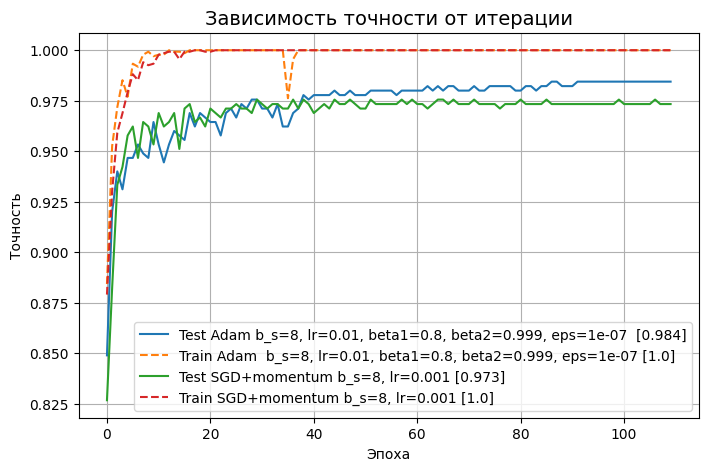

In [443]:
plt.figure(figsize=(8, 5))


elem = adam_res[11]
plt.plot(range(len(elem['train_acc'])), elem['test_acc'], label=f'Test Adam b_s=8, lr=0.01, beta1=0.8, beta2=0.999, eps=1e-07  [0.984]')
plt.plot(range(len(elem['train_acc'])), elem['train_acc'], '--', label=f'Train Adam  b_s=8, lr=0.01, beta1=0.8, beta2=0.999, eps=1e-07 [1.0]')

elem = sgd_mom_res[0]
tm = elem['time']
b_s = elem['b_s']
lr = elem['lr']
plt.plot(range(len(elem['train_acc'])), elem['test_acc'], label=f'Test SGD+momentum b_s={b_s}, lr={lr:.3f} [0.973]')
plt.plot(range(len(elem['train_acc'])), elem['train_acc'], '--', label=f'Train SGD+momentum b_s={b_s}, lr={lr:.3f} [1.0]')

plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("Зависимость точности от итерации", fontsize=14)
plt.legend()
plt.grid(True)

plt.show()


**ВЫВОД**:
1) Adam достигает высокой точности значительно быстрее SGD+momentum (примерно к 20-й эпохе); SGD+momentum достигает той же точности  медленнее (около 40-й эпохи)
2) Adam показывает более выраженные колебания на тестовой выборке; SGD+momentum  - более плавный прогресс с меньшими колебаниями
3) Adam достигает более высокой точности на тестовой выборке (0.984) по сравнению с SGD+momentum  (0.973)

Сравнивая все проведенные эксперименты для двух методов оптимизации, можно сделать выводы:
1) Adam более устойчив к изменению параметров
2) Adam в целом показывает лучшую точность практически во всех экспериментах



### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [455]:
class Dropout:
    def __init__(self, p=0.5):
        self.p = p
        self.train_mode = True
        self.mask = None
        self.params = []

    def forward(self, x):
        if self.train_mode and self.p > 0:
            self.mask = (np.random.rand(*x.shape) < (1 - self.p)).astype(x.dtype)
            return x * self.mask / (1 - self.p)
        return x

    def backward(self, grad_output):
        if self.train_mode and self.p > 0:
            return grad_output * self.mask / (1 - self.p), []
        return grad_output, []

    def train(self):
        self.train_mode = True

    def eval(self):
        self.train_mode = False

    def __repr__(self):
        return 'Dropout()'

In [456]:
def predict_new(network, X):
    drop_l = []
    for elem in network:
        if isinstance(elem, Dropout):
            drop_l.append(elem)
            
    modes = []
    for elem in drop_l:
        modes.append(elem.train_mode)
        
    for layer in drop_l:
        layer.eval()
    
    logprobs = forward(network, X)
    
    for elem, mode in zip(drop_l, modes):
        if mode:
            elem.train()
        else:
            elem.eval()
    
    return logprobs.argmax(axis=1)

In [457]:
def make_network_new(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU, dropout_p=0.5):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size
        
        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
            network.append(Dropout(p=dropout_p))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [469]:
class Callback_new:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []
        
    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        ### your code here
        set_weights(weights, self.network)
        train_pred = predict_new(network, X_train)
        test_pred = predict_new(network, X_test)
        temp_train_acc = accuracy(train_pred, y_train)
        temp_test_acc = accuracy(test_pred, y_test)
        self.train_acc.append(temp_train_acc)
        self.test_acc.append(temp_test_acc)
        
        if self.print:
            print(f'Качество на X_train: {temp_train_acc:.3f}; качество на X_test: {temp_test_acc:.3f}')

## Эксперименты с Dropout

In [505]:
d_p = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
n_l = [3, 10]
for p in d_p:
    for n in n_l:
        network = make_network_new(input_size, hidden_layers_size, output_size, n_layers=n, dropout_p=p)
        cb = Callback_new(network, X_train, y_train, X_test, y_test, print=False)
        initialize_network(network, 'Xavier')
        weights = get_weights(network)
        start_time = time.time()
        kwargs = {
            'beta1': 0.8,
            'beta2' :0.999,
            'epsilon': 1e-07,
            'n_iter': 110,
            'lr': 0.010,
            'batch_size': 8
        }
        res = minimize(compute_loss_grad, weights,  
                       args=(network, X_train, y_train), 
                       method=Adam,
                       jac=True,
                       options=kwargs,
                       callback=cb.call)
        tm = time.time() - start_time 
        print(f'p={p}, n_l={n}, time={tm:.3f}, acc_train={accuracy(predict_new(network, X_train), y_train):.3f}, acc_test={accuracy(predict_new(network, X_test), y_test):.3f}')



p=0.01, n_l=3, time=2.563, acc_train=1.000, acc_test=0.969
p=0.01, n_l=10, time=6.352, acc_train=0.994, acc_test=0.942
p=0.02, n_l=3, time=2.993, acc_train=0.999, acc_test=0.962
p=0.02, n_l=10, time=7.409, acc_train=0.999, acc_test=0.971
p=0.03, n_l=3, time=2.598, acc_train=0.993, acc_test=0.960
p=0.03, n_l=10, time=6.245, acc_train=0.988, acc_test=0.951
p=0.04, n_l=3, time=2.369, acc_train=0.998, acc_test=0.964
p=0.04, n_l=10, time=6.775, acc_train=0.987, acc_test=0.964
p=0.05, n_l=3, time=2.960, acc_train=0.993, acc_test=0.956
p=0.05, n_l=10, time=7.506, acc_train=0.973, acc_test=0.944
p=0.1, n_l=3, time=2.744, acc_train=0.994, acc_test=0.958
p=0.1, n_l=10, time=7.993, acc_train=0.935, acc_test=0.907
p=0.2, n_l=3, time=2.867, acc_train=0.980, acc_test=0.944
p=0.2, n_l=10, time=7.902, acc_train=0.751, acc_test=0.713
p=0.3, n_l=3, time=2.954, acc_train=0.984, acc_test=0.940
p=0.3, n_l=10, time=8.016, acc_train=0.385, acc_test=0.349


**ВЫВОДЫ**:
1) При значениях $p \ge 0$, качество заметно падает для случая 3-х и 10-ти слоев - слишком много нейронов отключается, что мешает модели обучаться
2) Так же видно, что чем больше слоев, тем больший параметр p требуется для достижения высшей точности (но вместе с тем значения p должны быть меньше 0.1)
3) В качестве оптимального значения p возьмем 0.02; он показывае хорошее качество как для 3-х слоев, так и для 10-ти

In [521]:
n_l = list(range(2, 11,1))
for n in n_l:
    network = make_network_new(input_size, hidden_layers_size, output_size, n_layers=n, dropout_p=0.02)
    cb = Callback_new(network, X_train, y_train, X_test, y_test, print=False)
    initialize_network(network, 'Xavier')
    weights = get_weights(network)
    start_time = time.time()
    kwargs = {
        'beta1': 0.8,
        'beta2' :0.999,
        'epsilon': 1e-07,
        'n_iter': 110,
        'lr': 0.010,
        'batch_size': 8
    }
    res = minimize(compute_loss_grad, weights,  
                   args=(network, X_train, y_train), 
                   method=Adam,
                   jac=True,
                   options=kwargs,
                   callback=cb.call)
    tm = time.time() - start_time 
    print(f'n_l={n}, time={tm:.3f}, acc_train={accuracy(predict_new(network, X_train), y_train):.3f}, acc_test={accuracy(predict_new(network, X_test), y_test):.3f}')



n_l=2, time=2.662, acc_train=1.000, acc_test=0.967
n_l=3, time=3.343, acc_train=1.000, acc_test=0.967
n_l=4, time=4.063, acc_train=1.000, acc_test=0.964
n_l=5, time=4.552, acc_train=0.999, acc_test=0.956
n_l=6, time=5.883, acc_train=0.999, acc_test=0.973
n_l=7, time=6.279, acc_train=0.999, acc_test=0.973
n_l=8, time=7.416, acc_train=0.995, acc_test=0.969
n_l=9, time=8.129, acc_train=0.986, acc_test=0.944
n_l=10, time=8.392, acc_train=0.993, acc_test=0.969


## Эксперименты без Dropout (с тем же кол-вом слоев)

In [522]:
n_l = list(range(2, 11,1))
for n in n_l:
    network = make_network_new(input_size, hidden_layers_size, output_size, n_layers=n, dropout_p=0)
    cb = Callback_new(network, X_train, y_train, X_test, y_test, print=False)
    initialize_network(network, 'Xavier')
    weights = get_weights(network)
    start_time = time.time()
    kwargs = {
        'beta1': 0.8,
        'beta2' :0.999,
        'epsilon': 1e-07,
        'n_iter': 110,
        'lr': 0.010,
        'batch_size': 8
    }
    res = minimize(compute_loss_grad, weights,  
                   args=(network, X_train, y_train), 
                   method=Adam,
                   jac=True,
                   options=kwargs,
                   callback=cb.call)
    tm = time.time() - start_time 
    print(f'n_l={n}, time={tm:.3f}, acc_train={accuracy(predict_new(network, X_train), y_train):.3f}, acc_test={accuracy(predict_new(network, X_test), y_test):.3f}')



n_l=2, time=2.414, acc_train=0.992, acc_test=0.969
n_l=3, time=2.890, acc_train=1.000, acc_test=0.978
n_l=4, time=3.098, acc_train=1.000, acc_test=0.980
n_l=5, time=3.502, acc_train=1.000, acc_test=0.964
n_l=6, time=4.395, acc_train=1.000, acc_test=0.971
n_l=7, time=4.937, acc_train=1.000, acc_test=0.967
n_l=8, time=5.896, acc_train=0.999, acc_test=0.969
n_l=9, time=6.320, acc_train=1.000, acc_test=0.956
n_l=10, time=7.017, acc_train=0.985, acc_test=0.958


**ВЫВОД**:
Модели без Droput имеют более выраженное переобучение при большинстве конфигураций. При малом числе слоев Droput не увеличивает точность (немного уменьшает) - так как сильного переубечения у модели нет и отключение нейронов не дает модели более полно обработать признаки; при увиличении числа слоев Dropout немного увеличивает точность, так как появлется большее переобучение и отключение нейронов его уменьшает. Так же видно, что на обучающей выборке точность всегда меньше у моделей с Dropout, что является ожидаемым эффектом

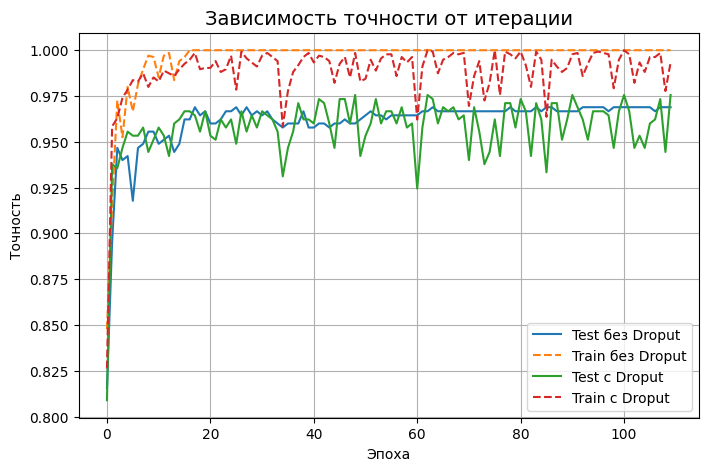

In [526]:
plt.figure(figsize=(8, 5))

network = make_network_new(input_size, hidden_layers_size, output_size, n_layers=5, dropout_p=0)
cb = Callback_new(network, X_train, y_train, X_test, y_test, print=False)
initialize_network(network, 'Xavier')
weights = get_weights(network)
kwargs = {
    'beta1': 0.8,
    'beta2' :0.999,
    'epsilon': 1e-07,
    'n_iter': 110,
    'lr': 0.010,
    'batch_size': 8
}
res = minimize(compute_loss_grad, weights,  
               args=(network, X_train, y_train), 
               method=Adam,
               jac=True,
               options=kwargs,
               callback=cb.call)

plt.plot(range(len(cb.test_acc)), cb.test_acc, label=f'Test без Droput')
plt.plot(range(len(cb.train_acc)), cb.train_acc, '--', label=f'Train без Droput')



network = make_network_new(input_size, hidden_layers_size, output_size, n_layers=5, dropout_p=0.02)
cb = Callback_new(network, X_train, y_train, X_test, y_test, print=False)
initialize_network(network, 'Xavier')
weights = get_weights(network)
kwargs = {
    'beta1': 0.8,
    'beta2' :0.999,
    'epsilon': 1e-07,
    'n_iter': 110,
    'lr': 0.010,
    'batch_size': 8
}
res = minimize(compute_loss_grad, weights,  
               args=(network, X_train, y_train), 
               method=Adam,
               jac=True,
               options=kwargs,
               callback=cb.call)

plt.plot(range(len(cb.test_acc)), cb.test_acc, label=f'Test c Droput')
plt.plot(range(len(cb.train_acc)), cb.train_acc, '--', label=f'Train c Droput')

plt.xlabel("Эпоха", fontsize=10)
plt.ylabel("Точность", fontsize=10)
plt.title("Зависимость точности от итерации", fontsize=14)
plt.legend()
plt.grid(True)

plt.show()

**ВЫВОДЫ**:
1) Модель без дропаута показывает более стабильную точность на тренировочных данных и тестовых данных
2) Дропаут уменьшает разрыв между тренировочной и тестовой выборками (так как работает как регулизатор)
3) В данной задаче эффект дропаута мал, но показывает, что данный метод может уменьшить переобучение

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.